In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ratings_df = pd.read_csv("ratings.csv")
movies_df = pd.read_csv("movies.csv")

In [3]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523


In [4]:
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


## EDA

In [5]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105339 entries, 0 to 105338
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     105339 non-null  int64  
 1   movieId    105339 non-null  int64  
 2   rating     105339 non-null  float64
 3   timestamp  105339 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.2 MB


In [6]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10329 entries, 0 to 10328
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  10329 non-null  int64 
 1   title    10329 non-null  object
 2   genres   10329 non-null  object
dtypes: int64(1), object(2)
memory usage: 242.2+ KB


In [7]:
ratings_df.describe()

,userId,movieId,rating,timestamp
count,105339.000000,105339.000000,105339.000000,1.053390e+05
mean,364.924539,13381.312477,3.516850,1.130424e+09
std,197.486905,26170.456869,1.044872,1.802660e+08
min,1.000000,1.000000,0.500000,8.285650e+08
25%,192.000000,1073.000000,3.000000,9.711008e+08
50%,383.000000,2497.000000,3.500000,1.115154e+09
75%,557.000000,5991.000000,4.000000,1.275496e+09
max,668.000000,149532.000000,5.000000,1.452405e+09


In [8]:
movies_df.describe()

,movieId
count,10329.000000
mean,31924.282893
std,37734.741149
min,1.000000
25%,3240.000000
50%,7088.000000
75%,59900.000000
max,149532.000000


In [9]:
ratings_df.isnull().sum()  #check the missing values

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [10]:
movies_df.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

### Getting Unique Users and Movies

In [11]:
# Getting number of unique users and movies from the dataset.
user_ids = ratings_df.userId.unique().tolist()
movie_ids = ratings_df.movieId.unique().tolist()
print('Number of Users: {}'.format(len(user_ids)))
print('Number of Movies: {}'.format(len(movie_ids)))

Number of Users: 668
Number of Movies: 10325


### Visualizing Data

In [12]:
genres=[]
for genre in movies_df.genres:
    
    x=genre.split('|')
    for i in x:
         if i not in genres:
            genres.append(str(i))
genres=str(genres)    
movie_title=[]
for title in movies_df.title:
    movie_title.append(title[0:-7])
movie_title=str(movie_title)    

In [13]:
from wordcloud import WordCloud

wordcloud_genre=WordCloud(width=1500,height=800,background_color='black',min_font_size=2
                    ,min_word_length=3).generate(genres)
wordcloud_title=WordCloud(width=1500,height=800,background_color='cyan',min_font_size=2
                    ,min_word_length=3).generate(movie_title)

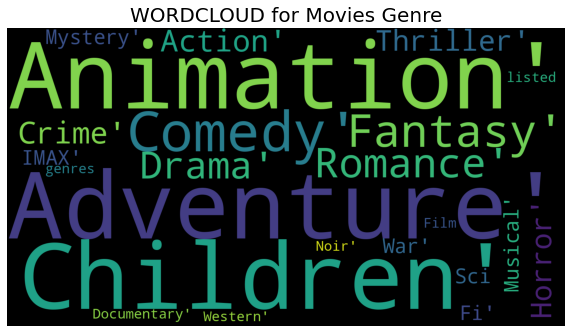

In [14]:
plt.figure(figsize=(10,10))
plt.axis('off')
plt.title('WORDCLOUD for Movies Genre',fontsize=20)
plt.imshow(wordcloud_genre)

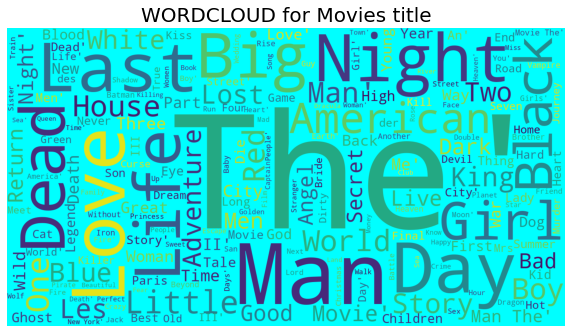

In [15]:
plt.figure(figsize=(10,10))
plt.axis('off')
plt.title('WORDCLOUD for Movies title',fontsize=20)
plt.imshow(wordcloud_title)

In [16]:
movie_data = pd.merge(ratings_df, movies_df, on='movieId')
movie_data

,userId,movieId,rating,timestamp,title,genres
0,1,16,4.0,1217897793,Casino (1995),Crime|Drama
1,9,16,4.0,842686699,Casino (1995),Crime|Drama
2,12,16,1.5,1144396284,Casino (1995),Crime|Drama
3,24,16,4.0,963468757,Casino (1995),Crime|Drama
4,29,16,3.0,836820223,Casino (1995),Crime|Drama
...,...,...,...,...,...,...
105334,668,140098,2.5,1450415424,Runoff (2015),Drama
105335,668,140816,2.5,1443288791,Tangerine (2015),Comedy|Drama
105336,668,141472,2.5,1442679119,The 50 Year Argument (2014),(no genres listed)
105337,668,142488,4.0,1451535844,Spotlight (2015),Thriller


In [17]:
df1=movie_data.groupby(['title'])[['rating']].sum()
high_rated=df1.nlargest(20,'rating')
high_rated.head()

,rating
title,
"Shawshank Redemption, The (1994)",1372.0
Pulp Fiction (1994),1352.0
Forrest Gump (1994),1287.0
"Silence of the Lambs, The (1991)",1216.5
Star Wars: Episode IV - A New Hope (1977),1143.5


<BarContainer object of 20 artists>

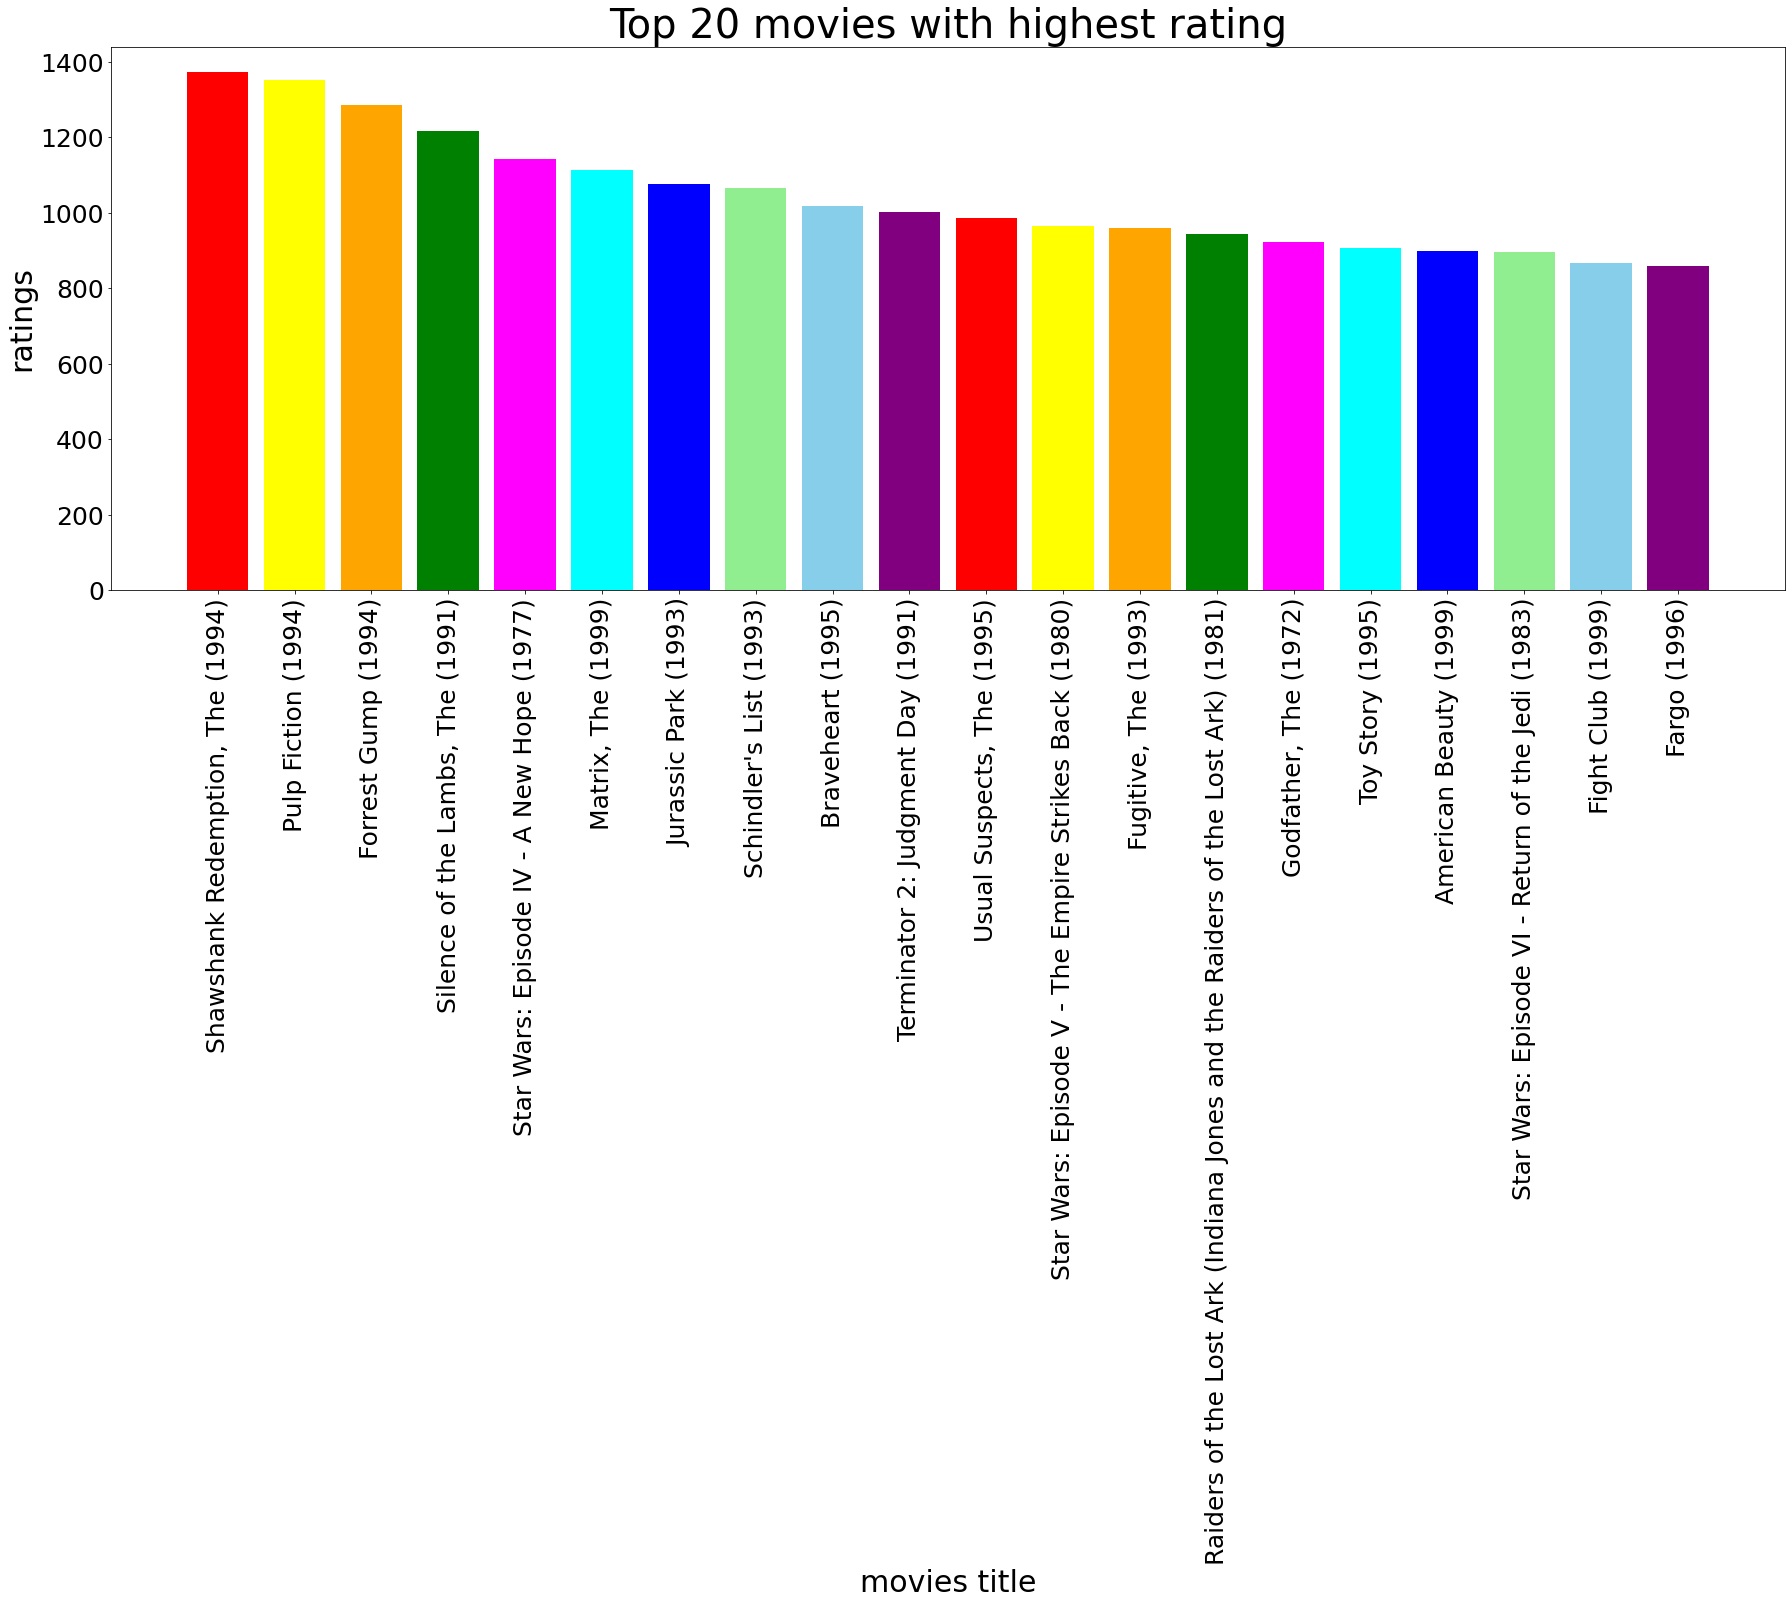

In [18]:
plt.figure(figsize=(30,10))
plt.title('Top 20 movies with highest rating',fontsize=40)
colors=['red','yellow','orange','green','magenta','cyan','blue','lightgreen','skyblue','purple']
plt.ylabel('ratings',fontsize=30)
plt.xticks(fontsize=25,rotation=90)
plt.xlabel('movies title',fontsize=30)
plt.yticks(fontsize=25)
plt.bar(high_rated.index,high_rated['rating'],linewidth=3,color=colors)

In [19]:
df2=movie_data.groupby('title')[['rating']].count()
rating_count_20=df2.nlargest(20,'rating')
rating_count_20.head()

,rating
title,
Pulp Fiction (1994),325
Forrest Gump (1994),311
"Shawshank Redemption, The (1994)",308
Jurassic Park (1993),294
"Silence of the Lambs, The (1991)",290


<BarContainer object of 20 artists>

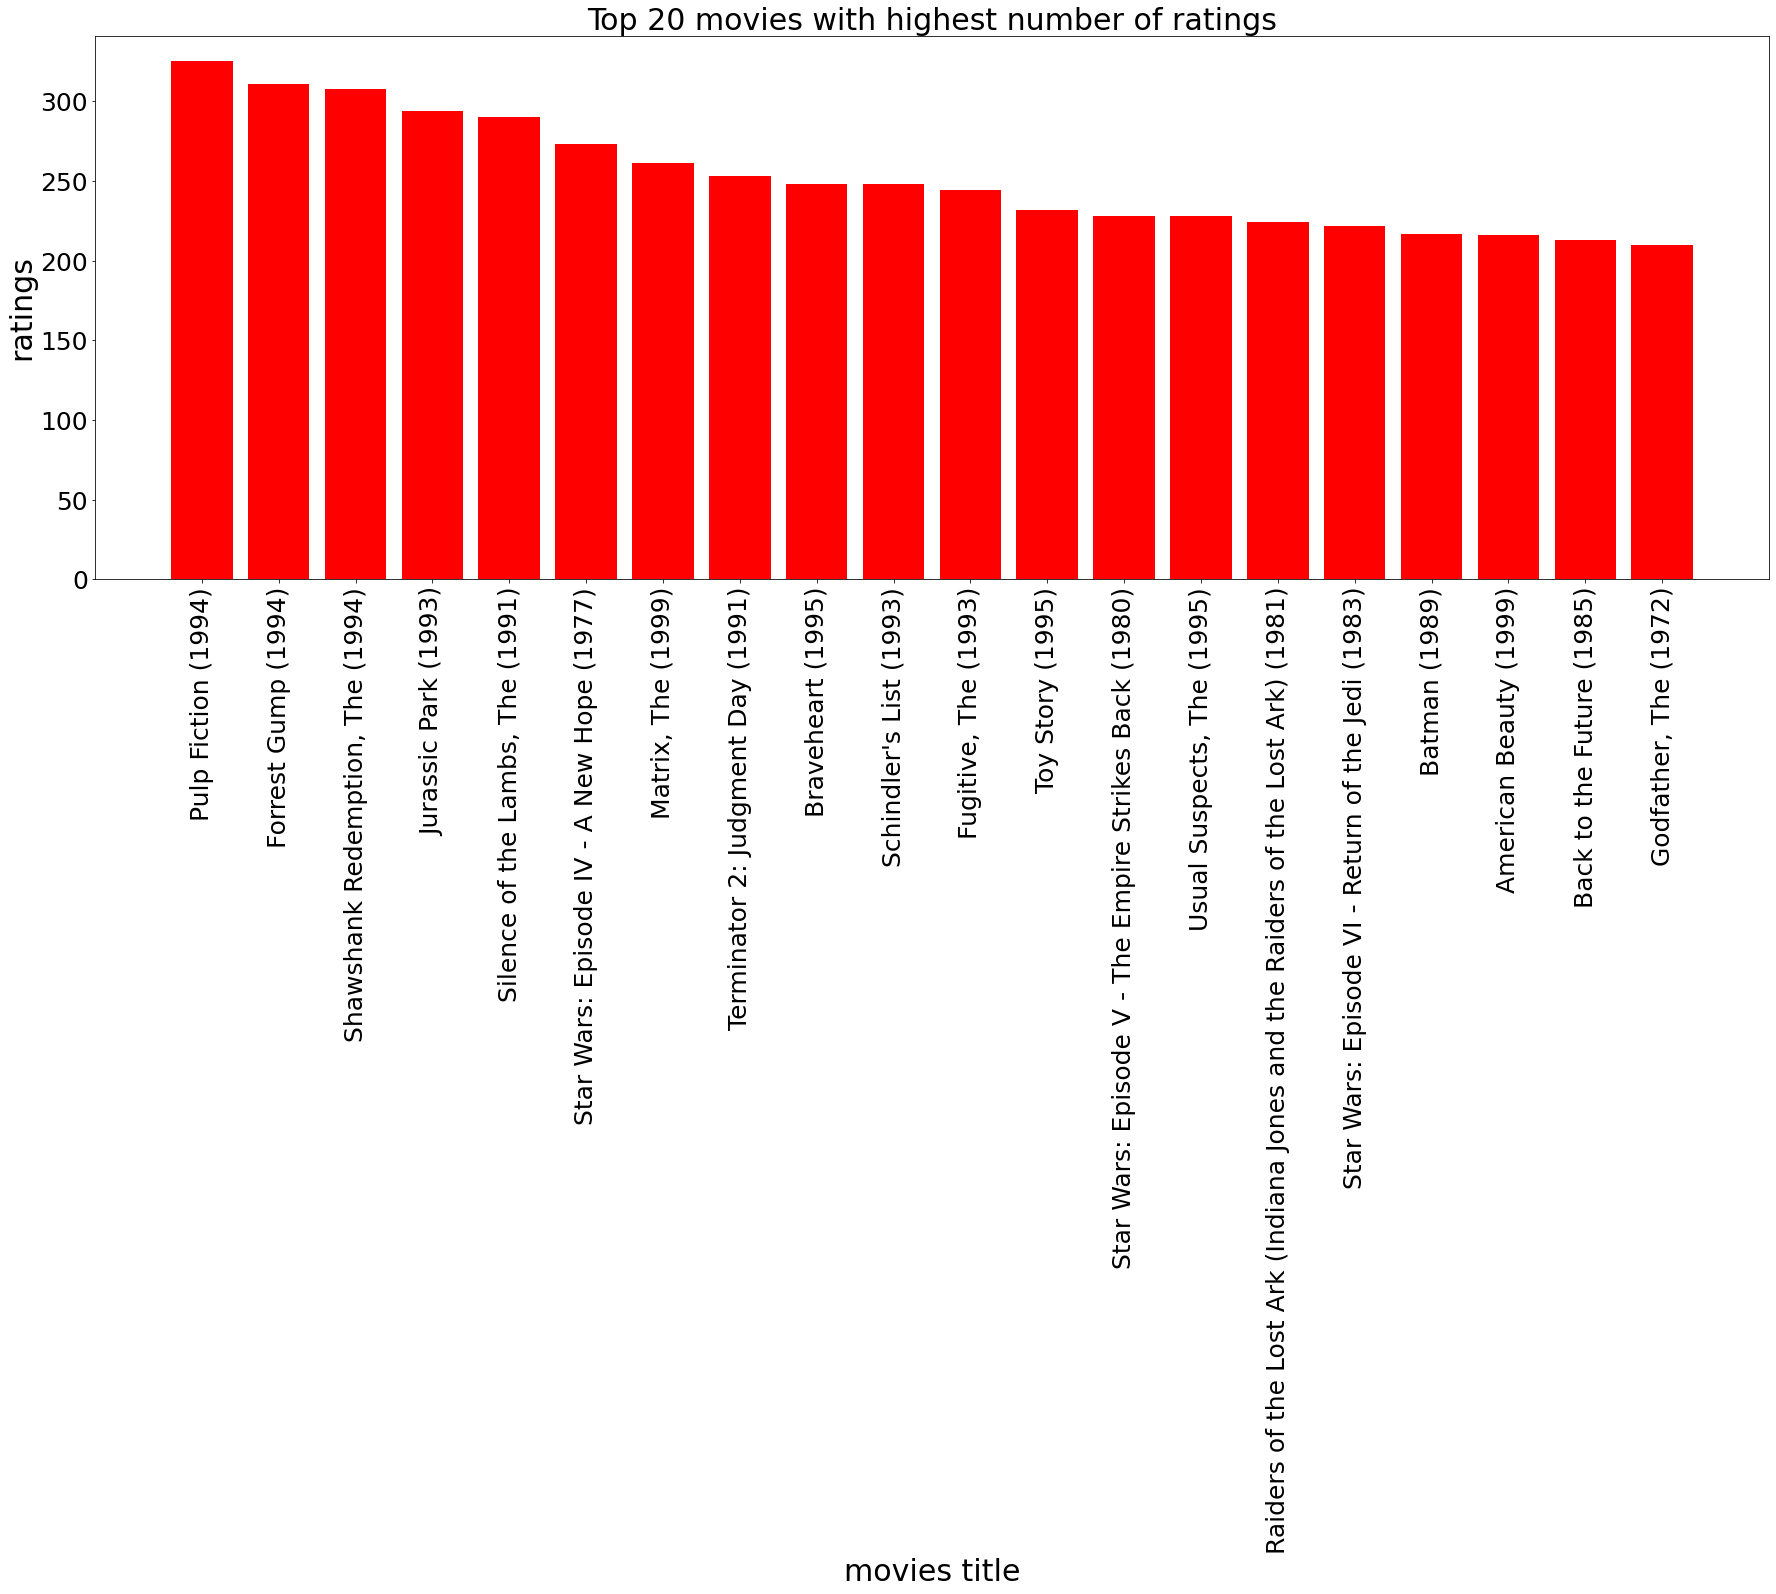

In [20]:
plt.figure(figsize=(30,10))
plt.title('Top 20 movies with highest number of ratings',fontsize=30)
plt.xticks(fontsize=25,rotation=90)
plt.yticks(fontsize=25)
plt.xlabel('movies title',fontsize=30)
plt.ylabel('ratings',fontsize=30)

plt.bar(rating_count_20.index,rating_count_20.rating,color='red')

In [21]:
df3 = movie_data.groupby('genres')[['rating']].mean()
df3.reset_index(inplace=True)
rating_genre_50=df3.nlargest(50,'rating')
rating_genre_50.reset_index(inplace=True)
rating_genre_50.head()

,index,genres,rating
0,46,Action|Adventure|Comedy|Crime|Romance|Thriller,5.0
1,144,Action|Animation|Crime|Sci-Fi,5.0
2,181,Action|Comedy|Drama|Romance,5.0
3,375,Adventure|Animation|Fantasy|Musical|Sci-Fi,5.0
4,411,Adventure|Comedy|Drama|Fantasy|Mystery|Sci-Fi|...,5.0


<BarContainer object of 50 artists>

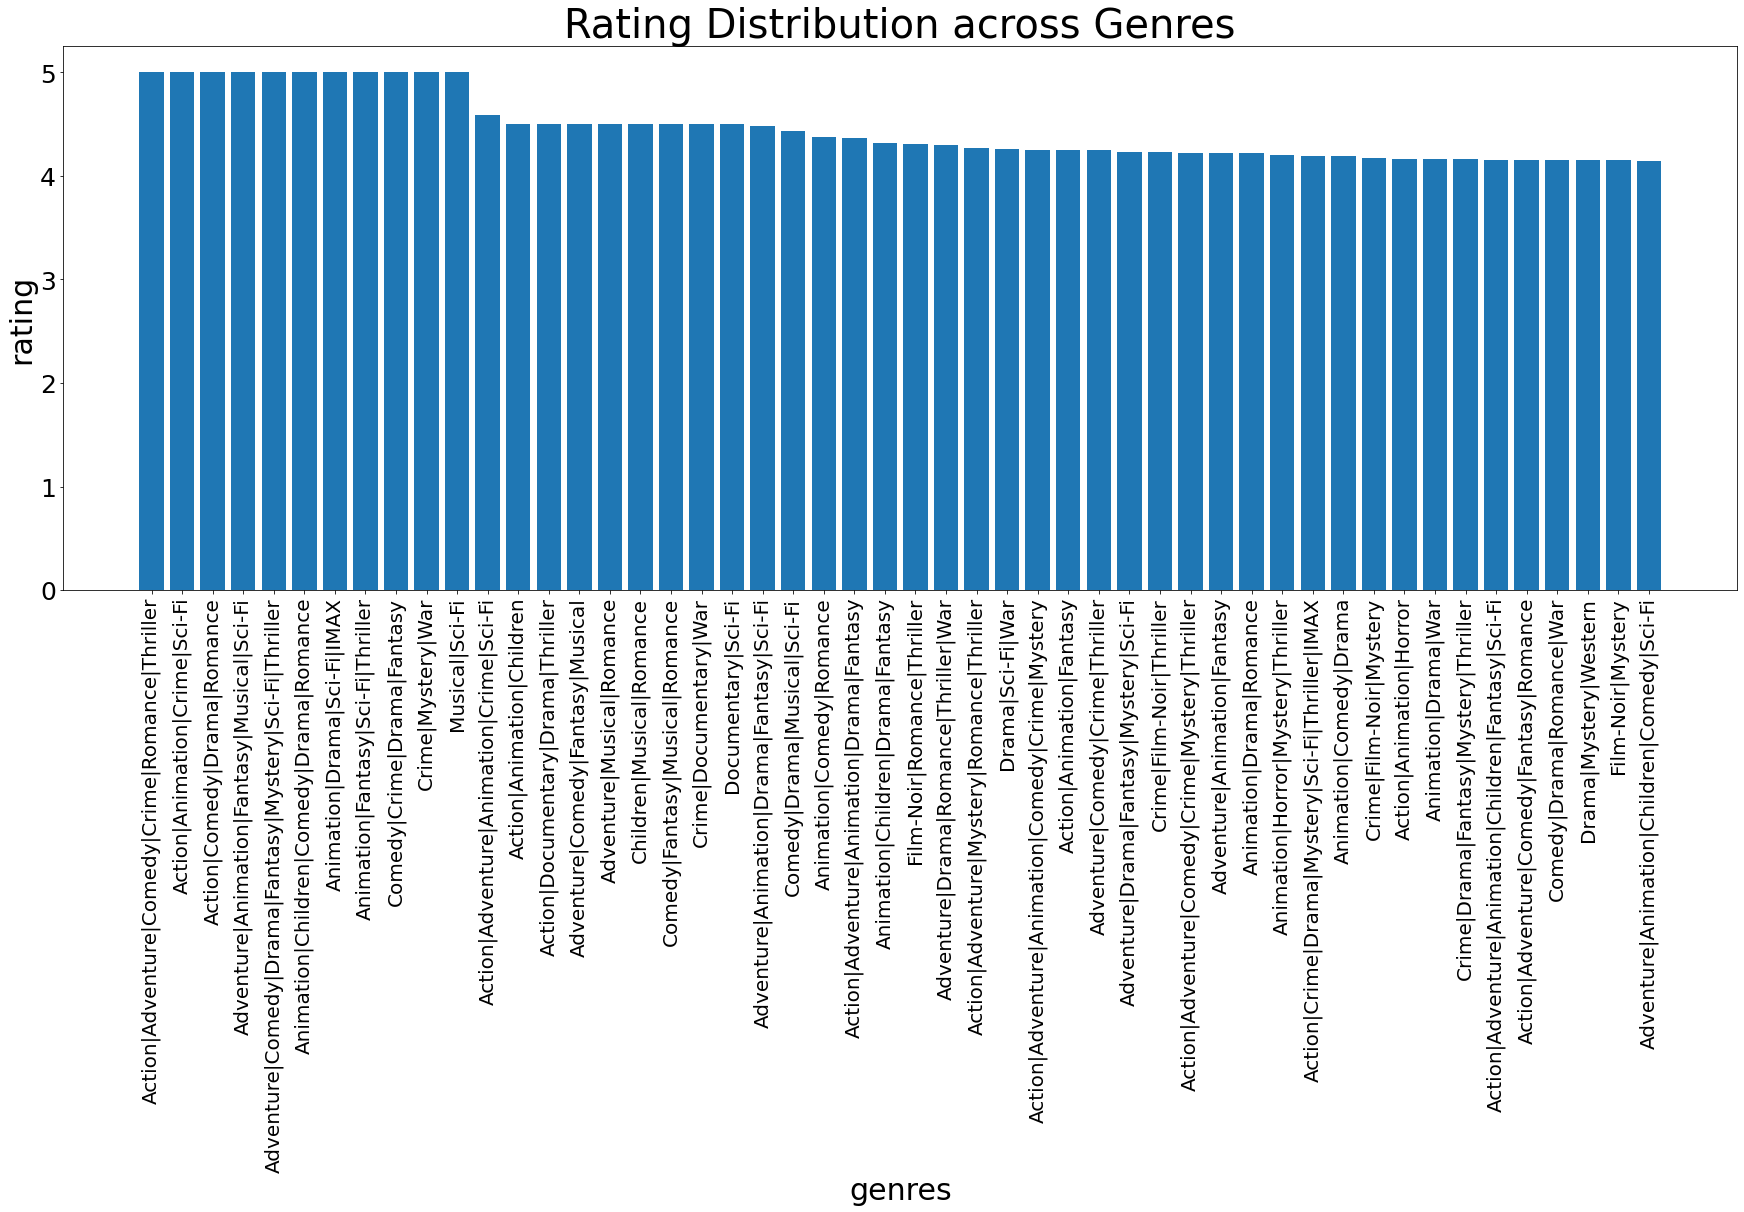

In [22]:
plt.figure(figsize=(30,10))
plt.title('Rating Distribution across Genres',fontsize=40)
plt.ylabel('rating',fontsize=30)
plt.xticks(fontsize=20,rotation=90)
plt.xlabel('genres',fontsize=30)
plt.yticks(fontsize=25)
plt.bar(rating_genre_50['genres'],rating_genre_50['rating'])

In [23]:
df4 = movie_data.groupby('genres')[['title']].count()
df4.reset_index(inplace=True)
title_genre_20=df4.nlargest(20,'title')
title_genre_20.reset_index(inplace=True)
title_genre_20.head()

,index,genres,title
0,779,Drama,7678
1,600,Comedy,6676
2,697,Comedy|Romance,3733
3,843,Drama|Romance,3407
4,631,Comedy|Drama,3101


<BarContainer object of 20 artists>

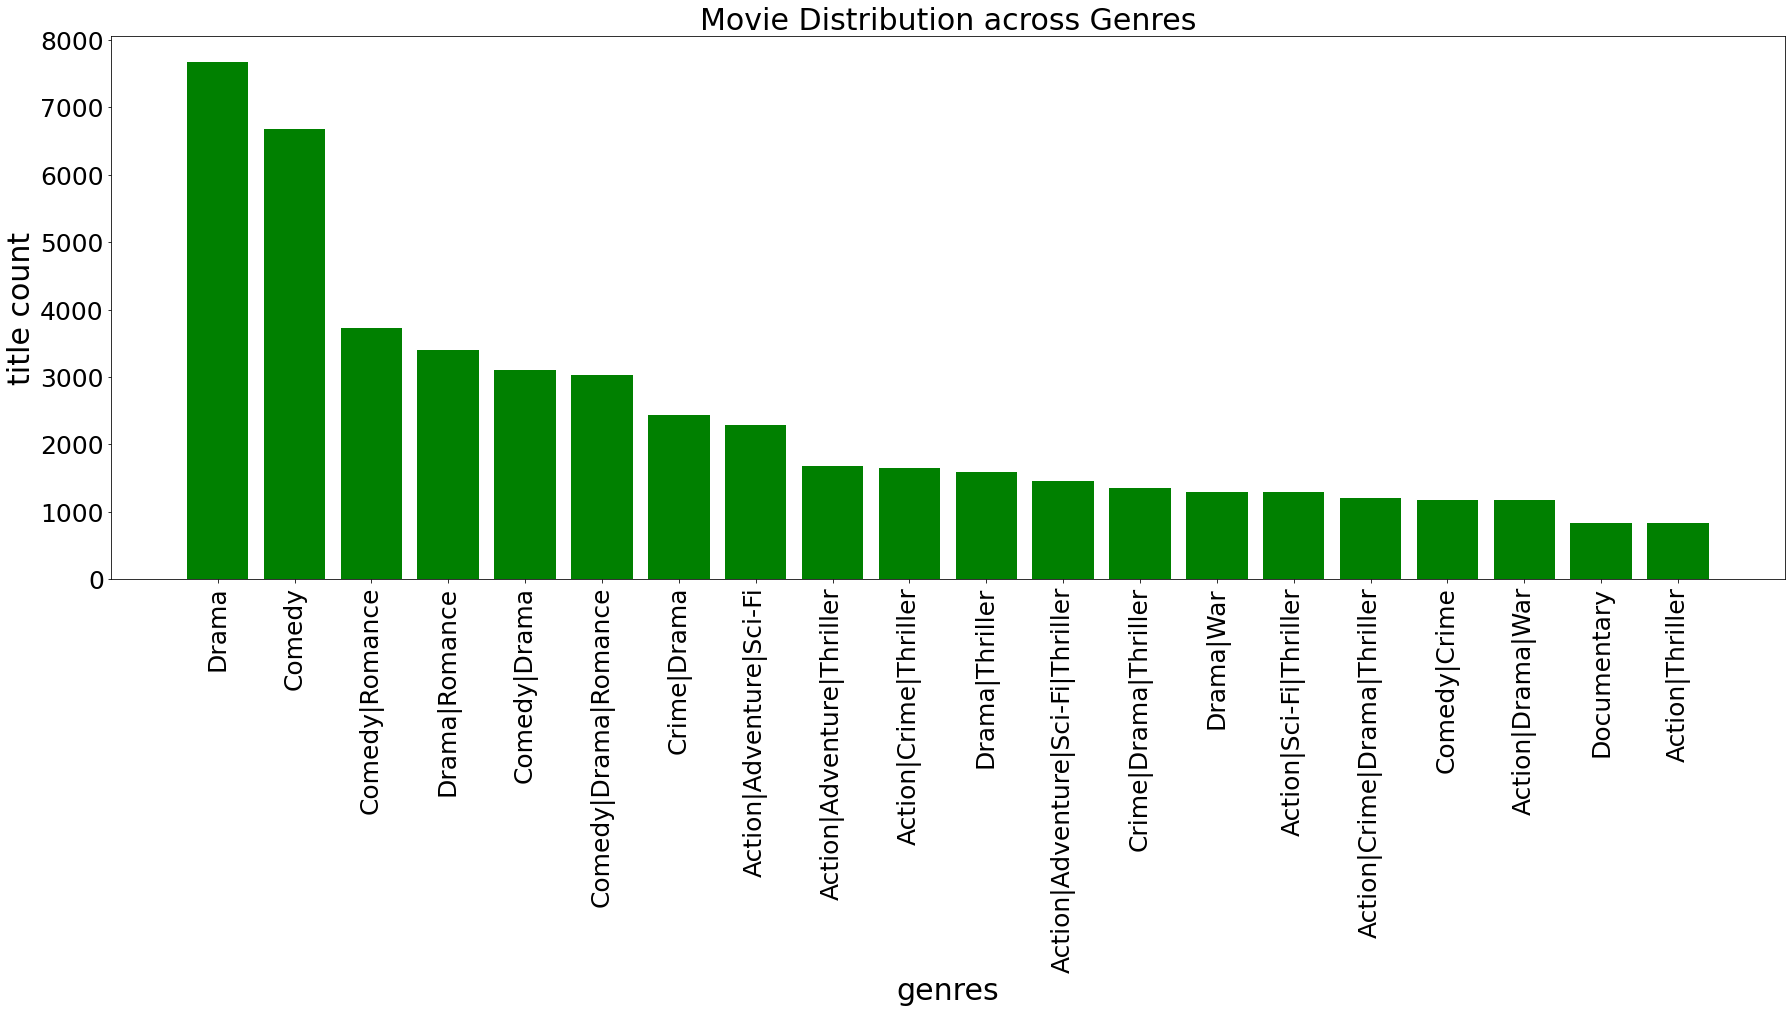

In [24]:
plt.figure(figsize=(30,10))
plt.title('Movie Distribution across Genres',fontsize=30)
plt.xticks(fontsize=25,rotation=90)
plt.yticks(fontsize=25)
plt.xlabel('genres',fontsize=30)
plt.ylabel('title count',fontsize=30)

plt.bar(title_genre_20['genres'],title_genre_20['title'],color='green')

## Popularity Based Recommender System

In [25]:
movie_data.groupby('title')['rating'].mean().head()

title
'71 (2014)                                 3.500
'Hellboy': The Seeds of Creation (2004)    3.000
'Round Midnight (1986)                     2.500
'Til There Was You (1997)                  4.000
'burbs, The (1989)                         3.125
Name: rating, dtype: float64

In [26]:
movie_data.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Saddest Music in the World, The (2003)    5.0
Interstate 60 (2002)                      5.0
Gunfighter, The (1950)                    5.0
Heima (2007)                              5.0
Limelight (1952)                          5.0
Name: rating, dtype: float64

In [27]:
ratings_mean_count = pd.DataFrame(movie_data.groupby(['movieId'])['rating'].mean())
ratings_mean_count

,rating
movieId,
1,3.907328
2,3.353261
3,3.189655
4,2.818182
5,3.250000
...,...
146684,4.000000
146878,2.500000
148238,3.000000


In [28]:
ratings_mean_count['rating_count'] = pd.DataFrame(movie_data.groupby('movieId')['rating'].count())
ratings_mean_count

,rating,rating_count
movieId,,
1,3.907328,232
2,3.353261,92
3,3.189655,58
4,2.818182,11
5,3.250000,62
...,...,...
146684,4.000000,1
146878,2.500000,1
148238,3.000000,1


In [29]:
ratings_mean_count['rating'] = round(ratings_mean_count['rating'],1)
ratings_mean_count

,rating,rating_count
movieId,,
1,3.9,232
2,3.4,92
3,3.2,58
4,2.8,11
5,3.2,62
...,...,...
146684,4.0,1
146878,2.5,1
148238,3.0,1


In [30]:
movies = movies_df[['movieId','title','genres']]
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
10324,146684,Cosmic Scrat-tastrophe (2015),Animation|Children|Comedy
10325,146878,Le Grand Restaurant (1966),Comedy
10326,148238,A Very Murray Christmas (2015),Comedy
10327,148626,The Big Short (2015),Drama


In [31]:
# Getting series of lists by applying split operation.
movies.genres = movies.genres.str.split('|')
# Getting distinct genre types for generating columns of genre type.
genre_columns = list(set([j for i in movies['genres'].tolist() for j in i]))

In [32]:
genre_columns

['IMAX',
 'War',
 'Drama',
 '(no genres listed)',
 'Sci-Fi',
 'Mystery',
 'Fantasy',
 'Musical',
 'Animation',
 'Documentary',
 'Horror',
 'Romance',
 'Children',
 'Crime',
 'Comedy',
 'Adventure',
 'Action',
 'Thriller',
 'Western',
 'Film-Noir']

In [33]:
# Iterating over every list to create and fill values into columns.
for j in genre_columns:
    movies[j] = 0
for i in range(movies.shape[0]):
    for j in genre_columns:
        if(j in movies['genres'].iloc[i]):
            movies.loc[i,j] = 1
# Separting movie title and year part using split function.
split_values = movies['title'].str.split("(", n = 1, expand = True)
# setting 'movie_title' values to title part.
movies.title = split_values[0]
# creating 'release_year' column.
movies['release_year'] = split_values[1]
# Cleaning the release_year series.
movies['release_year'] = movies.release_year.str.replace(')','')
# dropping 'genre' columns as it has already been one hot encoded.
movies.drop('genres',axis=1,inplace=True)

<ipython-input-33-8e49f15281dd>:15: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  movies['release_year'] = movies.release_year.str.replace(')','')


In [34]:
movies

,movieId,title,IMAX,War,Drama,(no genres listed),Sci-Fi,Mystery,Fantasy,Musical,...,Romance,Children,Crime,Comedy,Adventure,Action,Thriller,Western,Film-Noir,release_year
0,1,Toy Story,0,0,0,0,0,0,1,0,...,0,1,0,1,1,0,0,0,0,1995
1,2,Jumanji,0,0,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,1995
2,3,Grumpier Old Men,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1995
3,4,Waiting to Exhale,0,0,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1995
4,5,Father of the Bride Part II,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10324,146684,Cosmic Scrat-tastrophe,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,2015
10325,146878,Le Grand Restaurant,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1966
10326,148238,A Very Murray Christmas,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,2015
10327,148626,The Big Short,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2015


In [35]:
pop_df = pd.merge(ratings_mean_count, movies, on='movieId')
pop_df

,movieId,rating,rating_count,title,IMAX,War,Drama,(no genres listed),Sci-Fi,Mystery,...,Romance,Children,Crime,Comedy,Adventure,Action,Thriller,Western,Film-Noir,release_year
0,1,3.9,232,Toy Story,0,0,0,0,0,0,...,0,1,0,1,1,0,0,0,0,1995
1,2,3.4,92,Jumanji,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1995
2,3,3.2,58,Grumpier Old Men,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1995
3,4,2.8,11,Waiting to Exhale,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,1995
4,5,3.2,62,Father of the Bride Part II,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10320,146684,4.0,1,Cosmic Scrat-tastrophe,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,2015
10321,146878,2.5,1,Le Grand Restaurant,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1966
10322,148238,3.0,1,A Very Murray Christmas,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,2015
10323,148626,4.3,3,The Big Short,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,2015


In [36]:
pop_df = pop_df.sort_values(by="rating", ascending=False)
pop_df

,movieId,rating,rating_count,title,IMAX,War,Drama,(no genres listed),Sci-Fi,Mystery,...,Romance,Children,Crime,Comedy,Adventure,Action,Thriller,Western,Film-Noir,release_year
3559,4552,5.0,1,"Tetsuo, the Ironman",0,0,0,0,1,0,...,0,0,0,0,0,1,1,0,0,Tetsuo (1988
2653,3340,5.0,1,Bride of the Monster,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1955
110,124,5.0,1,"Star Maker, The",0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,"Uomo delle stelle, L' (1995"
2824,3559,5.0,1,Limelight,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,1952
4111,5357,5.0,1,Iron Will,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10138,120132,0.5,1,Annie,0,0,1,0,0,0,...,0,1,0,1,0,0,0,0,0,2014
6149,26409,0.5,1,"Clonus Horror, The",0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1979
7385,53131,0.5,1,Rise: Blood Hunter,0,0,0,0,0,1,...,0,0,0,0,0,1,1,0,0,2007
10226,132157,0.5,1,Paul Blart: Mall Cop 2,0,0,0,0,0,0,...,0,0,1,1,0,1,0,0,0,2015


In [39]:
g = input('Enter the genre of your choice: ')
t = int(input('Enter the minimum review threshold: '))
N = int(input('Enter the number of recommendations you want: '))
new_df = pop_df[(pop_df['rating_count']>t) & (pop_df[g]==1)]
new_df[['title','rating','rating_count']].head(N)

Enter the genre of your choice: Comedy
Enter the minimum review threshold: 10
Enter the number of recommendations you want: 1


,title,rating,rating_count
2720,Creature Comforts,4.5,13


## Content Based Recommender System

In [77]:
new_movies = movies_df
new_movies.head()

,movieId,title,genres
0,1,Toy Story,a d v e n t u r a n i m c h i l d r e n ...
1,2,Jumanji,a d v e n t u r c h i l d r e n f a n t a s i
2,3,Grumpier Old Men,c o m e d i r o m a n c
3,4,Waiting to Exhale,c o m e d i d r a m a r o m a n c
4,5,Father of the Bride Part II,c o m e d i


In [41]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [78]:
new_movies.head()

,movieId,title,genres
0,1,Toy Story,a d v e n t u r a n i m c h i l d r e n ...
1,2,Jumanji,a d v e n t u r c h i l d r e n f a n t a s i
2,3,Grumpier Old Men,c o m e d i r o m a n c
3,4,Waiting to Exhale,c o m e d i d r a m a r o m a n c
4,5,Father of the Bride Part II,c o m e d i


In [43]:
# Getting series of lists by applying split operation.
new_movies.genres = new_movies.genres.str.split('|')

In [76]:
new_movies.head()

,movieId,title,genres
0,1,Toy Story,a d v e n t u r a n i m c h i l d r e n ...
1,2,Jumanji,a d v e n t u r c h i l d r e n f a n t a s i
2,3,Grumpier Old Men,c o m e d i r o m a n c
3,4,Waiting to Exhale,c o m e d i d r a m a r o m a n c
4,5,Father of the Bride Part II,c o m e d i


In [75]:
new_movies['genres'] = new_movies['genres'].apply(lambda x:' '.join(x))
new_movies.head()

,movieId,title,genres
0,1,Toy Story,a d v e n t u r a n i m c h i l d r e n ...
1,2,Jumanji,a d v e n t u r c h i l d r e n f a n t a s i
2,3,Grumpier Old Men,c o m e d i r o m a n c
3,4,Waiting to Exhale,c o m e d i d r a m a r o m a n c
4,5,Father of the Bride Part II,c o m e d i


In [46]:
# Separting movie title and year part using split function.
split_values = new_movies['title'].str.split("(", n = 1, expand = True)
# setting 'movie_title' values to title part.
new_movies.title = split_values[0]

In [74]:
new_movies.head()

,movieId,title,genres
0,1,Toy Story,adventur anim children comedi fantasi
1,2,Jumanji,adventur children fantasi
2,3,Grumpier Old Men,comedi romanc
3,4,Waiting to Exhale,comedi drama romanc
4,5,Father of the Bride Part II,comedi


In [73]:
new_movies['genres'] = new_movies['genres'].apply(lambda X:X.lower())
new_movies.head()

,movieId,title,genres
0,1,Toy Story,adventur anim children comedi fantasi
1,2,Jumanji,adventur children fantasi
2,3,Grumpier Old Men,comedi romanc
3,4,Waiting to Exhale,comedi drama romanc
4,5,Father of the Bride Part II,comedi


In [49]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000, stop_words='english')

In [50]:
cv.fit_transform(new_movies['genres']).toarray().shape

(10329, 23)

In [51]:
vectors = cv.fit_transform(new_movies['genres']).toarray()

In [52]:
vectors[0]

array([0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0])

In [54]:
len(cv.get_feature_names())

AttributeError: ignored

In [55]:
import nltk

In [56]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [57]:
def stem(text):
    y=[]
    for i in text.split():
        y.append(ps.stem(i))
    return " ".join(y)

In [58]:
new_movies['genres']=new_movies['genres'].apply(stem)

In [59]:
from sklearn.metrics.pairwise import cosine_similarity

In [60]:
similarity = cosine_similarity(vectors)

In [61]:
cosine_similarity(vectors).shape

(10329, 10329)

In [62]:
sorted(list(enumerate(similarity[0])), reverse=True, key=lambda x:x[1])[1:4]

[(1815, 0.9999999999999999),
 (2496, 0.9999999999999999),
 (2967, 0.9999999999999999)]

In [63]:
similarity[0]

array([1.        , 0.77459667, 0.31622777, ..., 0.4472136 , 0.        ,
       0.        ])

In [64]:
similarity[0].shape

(10329,)

In [65]:
new_movies['title']=new_movies['title'].str.strip()

In [79]:
movie = input('Enter the movie of your choice: ')
N = int(input('Enter the number of recommendations you want: '))

def recommend(movie):
    movie_index = new_movies[new_movies['title']==movie].index[0]
    distances = similarity[movie_index]
    movies_list = sorted(list(enumerate(distances)), reverse=True, key=lambda x:x[1])[1:(N+1)]

    for i in movies_list:
        print(new_movies.iloc[i[0]].title)
        
recommend(movie)

Enter the movie of your choice: Premonition
Enter the number of recommendations you want: 1
Odd Thomas


## Collaborative Filtering Based Recommender System

In [67]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523


In [68]:
final_dataset = ratings_df.pivot(index='movieId',columns='userId',values='rating')
final_dataset.head()

userId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668
movieId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NaN,5.0,NaN,NaN,4.0,NaN,NaN,5.0,NaN,NaN,4.0,NaN,NaN,4.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,4.0,4.5,4.0,4.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,1.5,4.0,NaN,NaN,NaN,NaN,4.0,NaN,3.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,4.5,5.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,3.5,3.0,NaN,3.0,NaN,4.5,4.0,NaN,NaN,NaN,4.0,NaN,NaN,5.0,3.5,NaN,NaN,3.0,NaN,NaN,3.0,NaN,4.0,NaN,3.0,5.0,5.0,NaN,NaN,NaN,4.0,4.0,NaN,5.0,4.0,4.0,NaN,4.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,3.0,3.0,3.0,NaN,NaN,3.0,4.0,NaN,NaN,4.0,NaN,NaN,3.0,3.5,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,5.0,NaN,4.5,3.5,NaN,NaN,NaN,NaN,4.0,5.0,3.5,NaN,4.0,3.0,NaN,5.0,NaN,NaN,NaN,NaN,4.0,3.5,NaN,4.0,3.5,NaN,NaN,NaN,NaN,NaN,NaN,5.0,4.0

In [69]:
final_dataset.fillna(0,inplace=True)
final_dataset.head()

userId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668
movieId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0,5.0,0.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0,4.5,4.0,4.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,1.5,4.0,0.0,0.0,0.0,0.0,4.0,0.0,3.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,4.5,5.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,3.5,3.0,0.0,3.0,0.0,4.5,4.0,0.0,0.0,0.0,4.0,0.0,0.0,5.0,3.5,0.0,0.0,3.0,0.0,0.0,3.0,0.0,4.0,0.0,3.0,5.0,5.0,0.0,0.0,0.0,4.0,4.0,0.0,5.0,4.0,4.0,0.0,4.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,3.0,0.0,0.0,3.0,4.0,0.0,0.0,4.0,0.0,0.0,3.0,3.5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,5.0,0.0,4.5,3.5,0.0,0.0,0.0,0.0,4.0,5.0,3.5,0.0,4.0,3.0,0.0,5.0,0.0,0.0,0.0,0.0,4.0,3.5,0.0,4.0,3.5,0.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0

In [70]:
from scipy.sparse import csr_matrix

csr_data = csr_matrix(final_dataset.values)
final_dataset.reset_index(inplace=True)

In [71]:
final_dataset.head()

userId,movieId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668
0,1,0.0,5.0,0.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0,4.5,4.0,4.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,1.5,4.0,0.0,0.0,0.0,0.0,4.0,0.0,3.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,4.5,5.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,3.5,3.0,0.0,3.0,0.0,4.5,4.0,0.0,0.0,0.0,4.0,0.0,0.0,5.0,3.5,0.0,0.0,3.0,0.0,0.0,3.0,0.0,4.0,0.0,3.0,5.0,5.0,0.0,0.0,0.0,4.0,4.0,0.0,5.0,4.0,4.0,0.0,4.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,3.0,0.0,0.0,3.0,4.0,0.0,0.0,4.0,0.0,0.0,3.0,3.5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,5.0,0.0,4.5,3.5,0.0,0.0,0.0,0.0,4.0,5.0,3.5,0.0,4.0,3.0,0.0,5.0,0.0,0.0,0.0,0.0,4.0,3.5,0.0,4.0,3.5,0.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,0.0,0.0,0.0,4.0,0.0,0.0,4.0,4.0,0.0,5.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.5,0.0,3.5,0.0,0.0,3.5,0.0,4.0,0.0,0.0,0.0,4.5,0.0,4.0,0.0,0.0,0.0,3.0,0.0,3.5,3.0,0.0,4.0,4.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,0.0,4.0,0.0,0.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,5.0,2.0,0.0,0.0,5.0,0.0,0.0,5.0,4.0,0.0,0.0,0.0,0.0,0.0,3.5,0.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,4.0,0.0,3.0,4.0,0.0,0.0,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,5.0,3.0,0.0,2.0,0.0,0.0,0.0,5.0,4.0,3.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,4.0,5.0,0.0,3.0,0.0,3.0,0

In [72]:
user = int(input('Enter the userID: '))
N = int(input('Enter the number of recommendations you want: '))
k = int(input('Enter the threshold for number of users: '))


from sklearn.neighbors import NearestNeighbors
knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)
knn.fit(csr_data)

def get_movie_recommendation(user):
    n_movies_to_reccomend = N
    movie_list = movie_data[movie_data['userId']==user]  
    if len(movie_list):        
        movie_idx= movie_list.iloc[0]['movieId']
        movie_idx = final_dataset[final_dataset['movieId'] == movie_idx].index[0]
        distances , indices = knn.kneighbors(csr_data[movie_idx],n_neighbors=n_movies_to_reccomend+1)    
        rec_movie_indices = sorted(list(zip(indices.squeeze().tolist(),distances.squeeze().tolist())),key=lambda x: x[1])[:0:-1]
        recommend_frame = []
        for val in rec_movie_indices:
            movie_idx = final_dataset.iloc[val[0]]['movieId']
            idx = movies[movies['movieId'] == movie_idx].index
            recommend_frame.append({'Title':movies.iloc[idx]['title'].values[0],'Distance':val[1]})
        df = pd.DataFrame(recommend_frame,index=range(1,n_movies_to_reccomend+1))
        return df
    else:
        return "No movies found. Please check your input"
    
get_movie_recommendation(user)

Enter the userID: 1
Enter the number of recommendations you want: 5
Enter the threshold for number of users: 1


,Title,Distance
1,Donnie Brasco,0.547695
2,Reservoir Dogs,0.542634
3,True Romance,0.542325
4,Carlito's Way,0.539285
5,Goodfellas,0.496118
